<a href="https://colab.research.google.com/github/eleven111101/Gen_AI/blob/main/GPT_4o_by_Arnie_Course_(English).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the OpenAI Stuff

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00


Text-Generation with GPT-4o

In [ ]:
from openai import OpenAI

# Initialize the OpenAI client
client = OpenAI(api_key="Your KEY")

# Create a completion
completion = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {"role": "system", "content": "You are a helpful assistant, you know training."},
    {"role": "user", "content": "write a article, how to grow the calves"}
  ]
)

# Get the output text
output_text = completion.choices[0].message.content

# Save the output text to a file
with open("output.txt", "w") as file:
    file.write(output_text)

print("The output has been saved to output.txt")   # DONE!



The output has been saved to output.txt


Make Pics with Dall-E

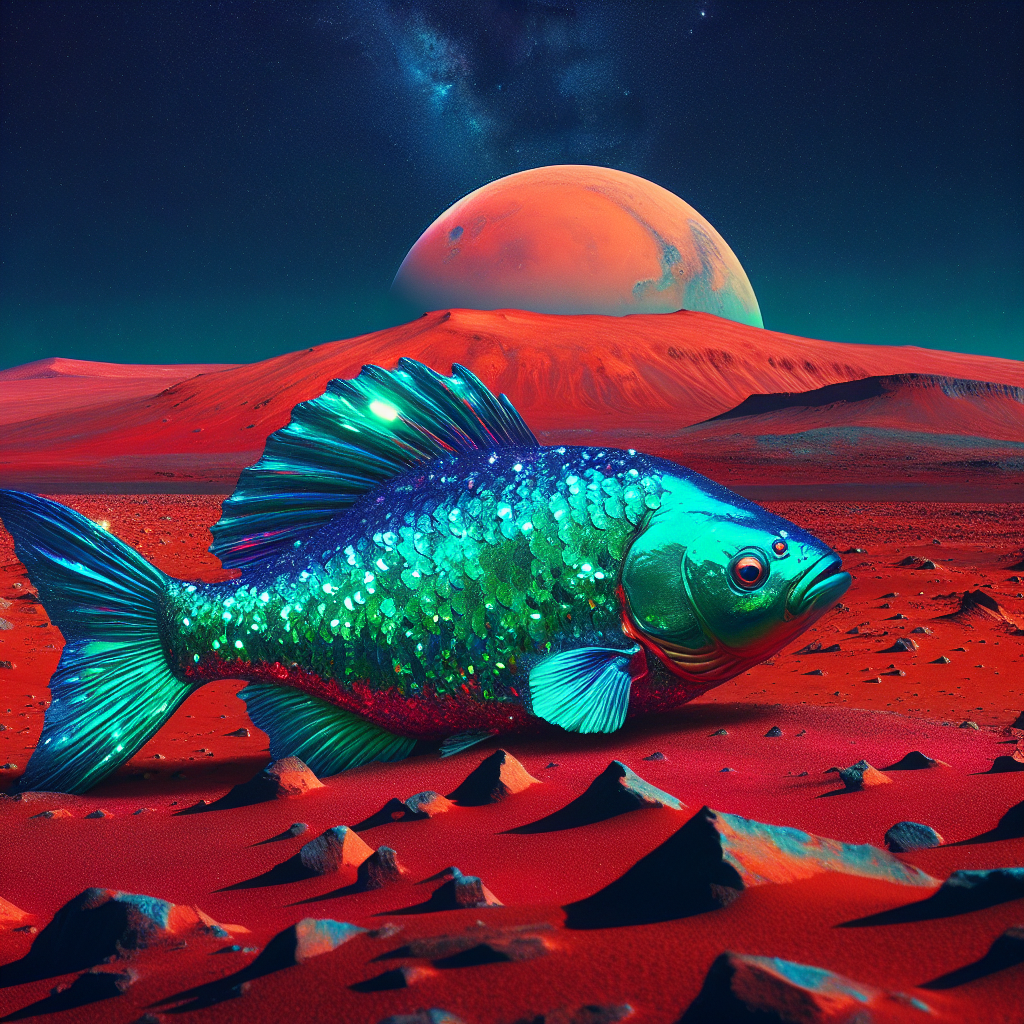

In [ ]:
from openai import OpenAI
import requests
from PIL import Image
from io import BytesIO
import IPython.display as display

# Initialize OpenAI client
client = OpenAI(api_key="Your KEY")

# Generate image using DALL-E 3
response = client.images.generate(
  model="dall-e-3",
  prompt="a fish on the mars",
  size="1024x1024",
  quality="standard",
  n=1,
)

# Get the image URL
image_url = response.data[0].url

# Download the image
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

# Display the image in Google Colab
display.display(img)

# Save the image to a file
img.save("red_siamese_cat_in_jungle.png")


Text to Speech

In [ ]:
from pathlib import Path
from openai import OpenAI
client = OpenAI(api_key="Your KEY")

speech_file_path = Path.cwd().parent / "speech.mp3"
response = client.audio.speech.create(
  model="tts-1-hd",
  voice="alloy",
  input="I love Arnies courses, they are so easy to understand!"
)

response.stream_to_file(speech_file_path)
speech_file_path

<ipython-input-17-1102388886f5>:12: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file(speech_file_path)


PosixPath('/speech.mp3')

Whisper (Speech to Text)

In [ ]:
from openai import OpenAI
client = OpenAI(api_key="Your KEY")

audio_file= open("/content/speech (2).mp3", "rb") # do not delete "rb"
transcription = client.audio.transcriptions.create(
  model="whisper-1",
  file=audio_file
)
print(transcription.text)

Today is a wonderful day to build something people love. The OpenAI API rocks.


Vision

In [ ]:
from openai import OpenAI

client = OpenAI (api_key="Your KEY")

response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in this image?"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='This image shows a scenic landscape with a wooden walkway or path leading through a grassy field. The pathway runs down the center of the image, with green vegetation and tall grasses on either side. In the background, there are trees and bushes, and the sky above is a clear blue with a few clouds scattered across it. The overall atmosphere is serene and natural, suggesting a peaceful outdoor environment, possibly a park, nature reserve, or countryside.', role='assistant', function_call=None, tool_calls=None))
